<a href="https://www.kaggle.com/code/siddheshmange/notebook9d1b96fab2?scriptVersionId=281115009" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/automobile123/Automobile_data.csv


# Load The Dataset

In [2]:
dataset = pd.read_csv("/kaggle/input/automobile123/Automobile_data.csv")
dataset.head(5)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# Convert the values "?" to Nan

In [3]:
dataset = dataset.replace('?', np.nan)


In [4]:
dataset.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


#  Dropping the Columns Which are not use


In [5]:
dropped_columns = ['symboling', 'normalized-losses', 'num-of-doors', 'engine-location', 'fuel-system', 'stroke']
dataset = dataset.drop(columns=dropped_columns)

In [6]:
dataset.head(5)

,make,fuel-type,aspiration,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,bore,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,9.0,154,5000,19,26,16500
3,audi,gas,std,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,10.0,102,5500,24,30,13950
4,audi,gas,std,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,8.0,115,5500,18,22,17450


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               205 non-null    object 
 1   fuel-type          205 non-null    object 
 2   aspiration         205 non-null    object 
 3   body-style         205 non-null    object 
 4   drive-wheels       205 non-null    object 
 5   wheel-base         205 non-null    float64
 6   length             205 non-null    float64
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   curb-weight        205 non-null    int64  
 10  engine-type        205 non-null    object 
 11  num-of-cylinders   205 non-null    object 
 12  engine-size        205 non-null    int64  
 13  bore               201 non-null    object 
 14  compression-ratio  205 non-null    float64
 15  horsepower         203 non-null    object 
 16  peak-rpm           203 non

# Convert Categorical Data to Numeric Data by using LabelEncoding¶

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
encoded_columns = ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels','engine-type', 'num-of-cylinders', 'bore', 'horsepower', 'peak-rpm', 'price']
for col in encoded_columns:
    dataset[col] = le.fit_transform(dataset[col]).astype('int64')

In [11]:
dataset.head(10)

,make,fuel-type,aspiration,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,bore,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,1,0,0,2,88.6,168.8,64.1,48.8,2548,0,2,130,23,9.0,5,10,21,27,31
1,0,1,0,0,2,88.6,168.8,64.1,48.8,2548,0,2,130,23,9.0,5,10,21,27,50
2,0,1,0,2,2,94.5,171.2,65.5,52.4,2823,5,3,152,1,9.0,20,10,19,26,50
3,1,1,0,3,1,99.8,176.6,66.2,54.3,2337,3,2,109,13,10.0,2,16,24,30,36
4,1,1,0,3,0,99.4,176.6,66.4,54.3,2824,3,1,136,13,8.0,8,16,18,22,61
5,1,1,0,3,1,99.8,177.3,66.3,53.1,2507,3,1,136,13,8.5,4,16,19,25,41
6,1,1,0,3,1,105.8,192.7,71.4,55.7,2844,3,1,136,13,8.5,4,16,19,25,63
7,1,1,0,4,1,105.8,192.7,71.4,55.7,2954,3,1,136,13,8.5,4,16,19,25,71
8,1,1,1,3,1,105.8,192.7,71.4,55.9,3086,3,1,131,10,8.3,15,16,17,20,81
9,1,1,1,2,0,99.5,178.2,67.9,52.0,3053,3,1,131,10,7.0,23,16,16,22,186


In [12]:
dataset.isnull().sum()

make                 0
fuel-type            0
aspiration           0
body-style           0
drive-wheels         0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
bore                 0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

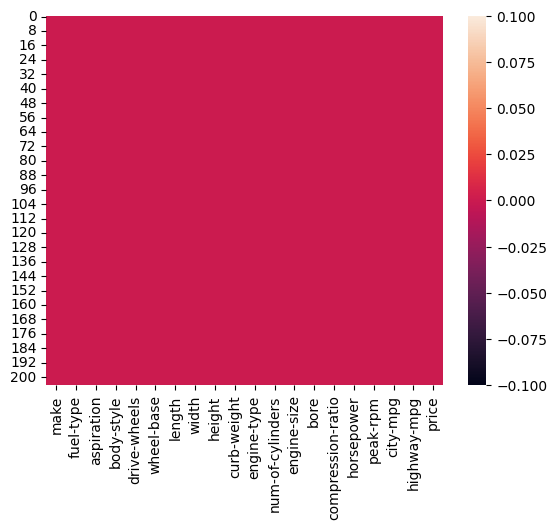

In [14]:
sns.heatmap(dataset.isnull())
plt.show()

In [15]:
dataset.describe()

,make,fuel-type,aspiration,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,bore,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,12.195122,0.902439,0.180488,2.614634,1.326829,98.756585,174.049268,65.907805,53.724878,2555.565854,3.014634,2.117073,126.907317,18.336585,10.142537,31.726829,11.604878,25.219512,30.751220,96.648780
std,6.274831,0.297446,0.385535,0.859081,0.556171,6.021776,12.337289,2.145204,2.443522,520.680204,1.054765,0.795792,41.642693,10.368640,3.972040,18.572949,5.318758,6.542142,6.886443,54.675007
min,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,0.000000,0.000000,61.000000,0.000000,7.000000,0.000000,0.000000,13.000000,16.000000,0.000000
25%,8.000000,1.000000,0.000000,2.000000,1.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,3.000000,2.000000,97.000000,11.000000,8.600000,12.000000,8.000000,19.000000,25.000000,50.000000
50%,12.000000,1.000000,0.000000,3.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,3.000000,2.000000,120.000000,16.000000,9.000000,40.000000,12.000000,24.000000,30.000000,99.000000
75%,19.000000,1.000000,0.000000,3.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,3.000000,2.000000,141.000000,28.000000,9.400000,47.000000,16.000000,30.000000,34.000000,144.000000
max,21.000000,1.000000,1.000000,4.000000,2.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,6.000000,6.000000,326.000000,38.000000,23.000000,59.000000,23.000000,49.000000,54.000000,186.000000


# Data Visualisation of Selective Columns


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


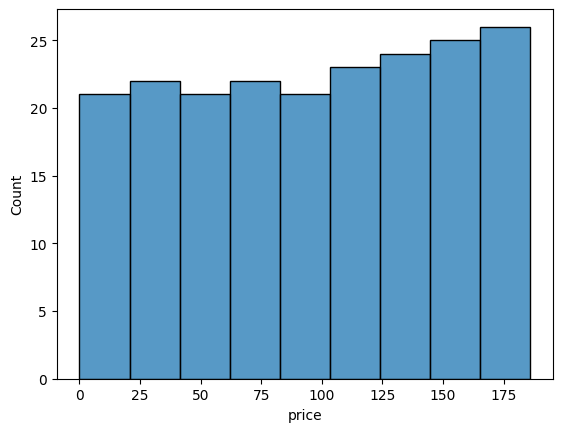

In [16]:
sns.histplot(data=dataset,x="price")
plt.show()

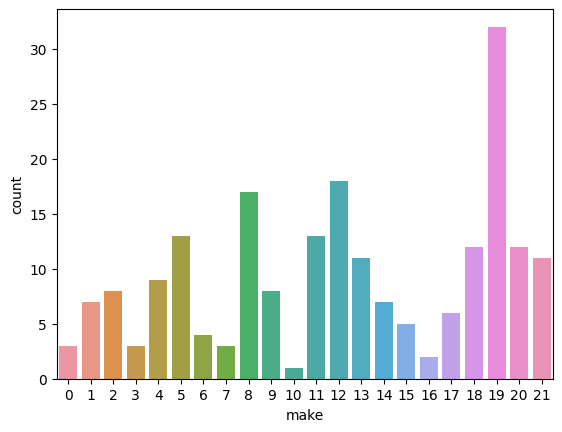

In [17]:
sns.countplot(data=dataset,x='make')
plt.show()

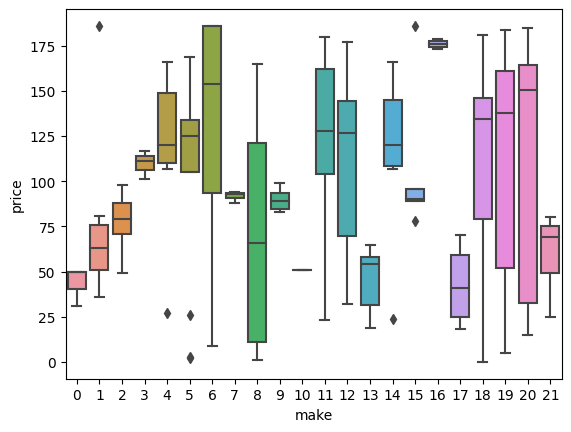

In [18]:
sns.boxplot(x='make',y='price',data=dataset)
plt.show()

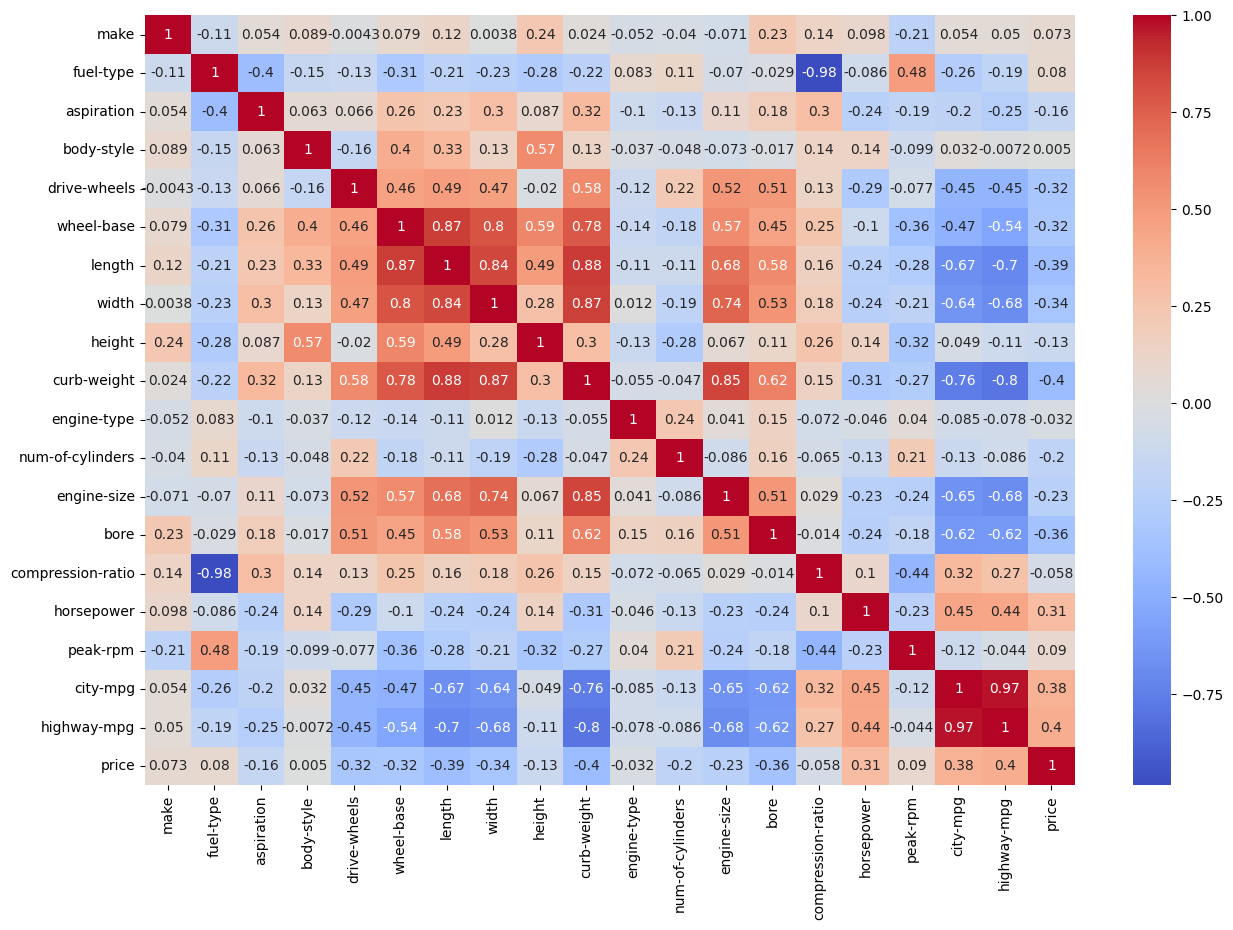

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True, cmap="coolwarm")
plt.show()

<Axes: xlabel='make'>

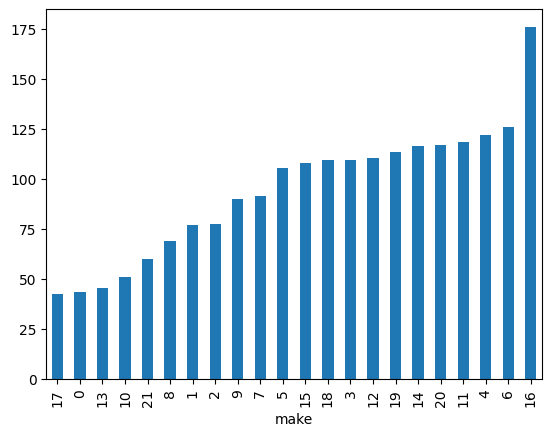

In [20]:
dataset.groupby('make')['price'].mean().sort_values().plot(kind='bar')


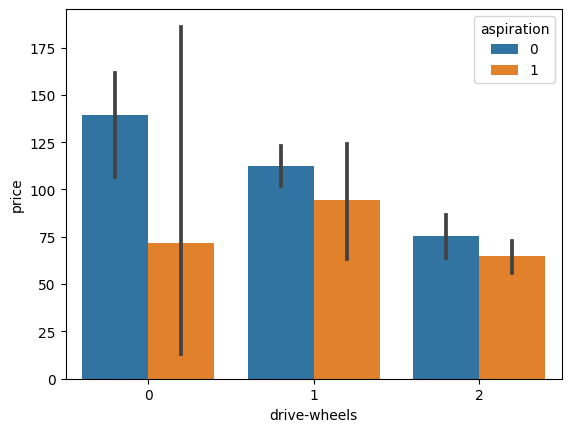

In [21]:
sns.barplot(x='drive-wheels',y='price',hue='aspiration',data=dataset)
plt.show()

# Training and Testing the Data By using RandomForestRegressor


In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
Rfr = RandomForestRegressor(n_estimators=100,random_state=42)


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x = dataset.iloc[:,:-1]
y = dataset["price"]

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
Rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [28]:
Rfr.score(x_train,y_train)*100 , Rfr.score(x_test,y_test)*100

(91.22804086790703, 27.147634575309265)

# Project Done